<a href="https://colab.research.google.com/github/Enigmatik100/projet-IOT/blob/master/ProjetIOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet IOT

## A partir du fichier de relevé de mesures du capteur Netatmo de la salle Ubiquarium, extrayez les mesures de Co2, Température, Humidité horodatées dans un fichier excel (après import du csv et transformation des données : ex. = ARRONDI(...); formules de passage en unité du système international ...)

In [679]:
#To generate pdf from the notebook 
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc



In [680]:
# import useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

In [681]:
path = 'drive/MyDrive/IOT_DATASET/L3IA.csv'

In [682]:
data = pd.read_csv(path, delimiter=";", decimal=",")

In [683]:
data.head(4)

,timestamp,IndoorNetatmo02_Co2,IndoorNetatmo02_Temperature,IndoorNetatmo02_Humidity,MotionDetector01_Sensor_Binary,MultiSensorDoor10_Sensor_Door,MultiSensorDoor09_Sensor_Door,MultiSensorDoor02_Sensor_Door,MultiSensorDoor07_Sensor_Door,MultiSensorDoor08_Sensor_Door,MultiSensorDoor01_Sensor_Door,MultiSensorDoor14_Sensor_Door,Dahua03_MotionAlarm,MultiSensor02_Motion_Alarm,MultiSensor03_Motion_Alarm
0,1647840265,427,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
1,1647840874,412,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
2,1647841034,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
3,1647841477,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0


In [684]:
# Selectionnons les colonnes concernées
columns = ['timestamp', 'IndoorNetatmo02_Co2', 'IndoorNetatmo02_Temperature',  'IndoorNetatmo02_Humidity']

df_ibuquarium = data[columns]

In [685]:
data.head(3)

,timestamp,IndoorNetatmo02_Co2,IndoorNetatmo02_Temperature,IndoorNetatmo02_Humidity,MotionDetector01_Sensor_Binary,MultiSensorDoor10_Sensor_Door,MultiSensorDoor09_Sensor_Door,MultiSensorDoor02_Sensor_Door,MultiSensorDoor07_Sensor_Door,MultiSensorDoor08_Sensor_Door,MultiSensorDoor01_Sensor_Door,MultiSensorDoor14_Sensor_Door,Dahua03_MotionAlarm,MultiSensor02_Motion_Alarm,MultiSensor03_Motion_Alarm
0,1647840265,427,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
1,1647840874,412,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
2,1647841034,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0


In [686]:
# Renommons les colonnes
columns_name = {'timestamp': 'DateTime' , 'IndoorNetatmo02_Co2': 'CO2', 'IndoorNetatmo02_Temperature': 'Temperature', 'IndoorNetatmo02_Humidity': 'Humidite'}
df_ibuquarium = df_ibuquarium.rename(columns=columns_name)

In [687]:
data.head(5)

,timestamp,IndoorNetatmo02_Co2,IndoorNetatmo02_Temperature,IndoorNetatmo02_Humidity,MotionDetector01_Sensor_Binary,MultiSensorDoor10_Sensor_Door,MultiSensorDoor09_Sensor_Door,MultiSensorDoor02_Sensor_Door,MultiSensorDoor07_Sensor_Door,MultiSensorDoor08_Sensor_Door,MultiSensorDoor01_Sensor_Door,MultiSensorDoor14_Sensor_Door,Dahua03_MotionAlarm,MultiSensor02_Motion_Alarm,MultiSensor03_Motion_Alarm
0,1647840265,427,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
1,1647840874,412,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
2,1647841034,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
3,1647841477,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
4,1647841990,399,19.799999,31,0,0,0,0,0,0,0,0,0,0,0


In [688]:
# convertissons le timestamp
df_ibuquarium['DateTime'] = pd.to_datetime(df_ibuquarium['DateTime'], unit='s')

In [689]:
data.head(4)

,timestamp,IndoorNetatmo02_Co2,IndoorNetatmo02_Temperature,IndoorNetatmo02_Humidity,MotionDetector01_Sensor_Binary,MultiSensorDoor10_Sensor_Door,MultiSensorDoor09_Sensor_Door,MultiSensorDoor02_Sensor_Door,MultiSensorDoor07_Sensor_Door,MultiSensorDoor08_Sensor_Door,MultiSensorDoor01_Sensor_Door,MultiSensorDoor14_Sensor_Door,Dahua03_MotionAlarm,MultiSensor02_Motion_Alarm,MultiSensor03_Motion_Alarm
0,1647840265,427,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
1,1647840874,412,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
2,1647841034,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0
3,1647841477,408,19.799999,32,0,0,0,0,0,0,0,0,0,0,0


In [690]:
df_ibuquarium.isna().sum()

DateTime       0
CO2            0
Temperature    0
Humidite       0
dtype: int64

In [691]:
df_ibuquarium['Temperature'].dtype

dtype('float64')


Précisons les unités pour chaque colonne

*   **CO2**: Le CO2 se mesure en **ppm** (parties par million), c'est-à-dire le nombre de molécules de CO2 présentes parmi un
million de molécules d'air. Les niveaux de CO2 à l'intérieur varient habituellement entre 400 et 5000 ppm.
*   **Temperature**: En degré celcius
*   **Humidité**: L'humidité relative est la mesure de la quantité de vapeur d'eau contenue dans l'air (à une température donnée)
relativement à la quantité maximum de vapeur d'eau que pourrait contenir l'air à cette température. Elle est
exprimée en pourcentage.



In [692]:
print('Le CO2 maximal =', df_ibuquarium['CO2'].max() )
print('Le CO2 minimal =', df_ibuquarium['CO2'].min() )

Le CO2 maximal = 1055
Le CO2 minimal = 395


In [693]:
print("La température maximale = ", df_ibuquarium['Temperature'].max() )
print("La température minimale =", df_ibuquarium['Temperature'].min() )

La température maximale =  23.79999924
La température minimale = 19.79999924


In [694]:
print("L'humidité maximale = ", df_ibuquarium['Humidite'].max() )
print("L'humidité minimale =", df_ibuquarium['Humidite'].min() )

L'humidité maximale =  35
L'humidité minimale = 24


Quelle période que couvre nos données ?

In [695]:
df_ibuquarium['DateTime'].head(1)

0   2022-03-21 05:24:25
Name: DateTime, dtype: datetime64[ns]

In [696]:
df_ibuquarium['DateTime'].tail(1)

3151   2022-03-26 23:53:29
Name: DateTime, dtype: datetime64[ns]

Nos données couvrent la période de 2022-03-21 05:24:25 au 2022-03-26 23:53:29

Déjà sur l'hyperplanning on se rend déjà compte qu'il y a eu deux cours dans la salle Ibuquarium:



*   Le 22/03/ 2022  de 08h à 09h
*   Le 22/03/ 2022 de 09h15 à 11h45



## Visualisation

### Graphe 1 à 1 sous forme de série temporelle

In [697]:
df_ibuquarium = df_ibuquarium.set_index(['DateTime'])

In [698]:
df_ibuquarium.head()

,CO2,Temperature,Humidite
DateTime,,,
2022-03-21 05:24:25,427,19.799999,32
2022-03-21 05:34:34,412,19.799999,32
2022-03-21 05:37:14,408,19.799999,32
2022-03-21 05:44:37,408,19.799999,32
2022-03-21 05:53:10,399,19.799999,31


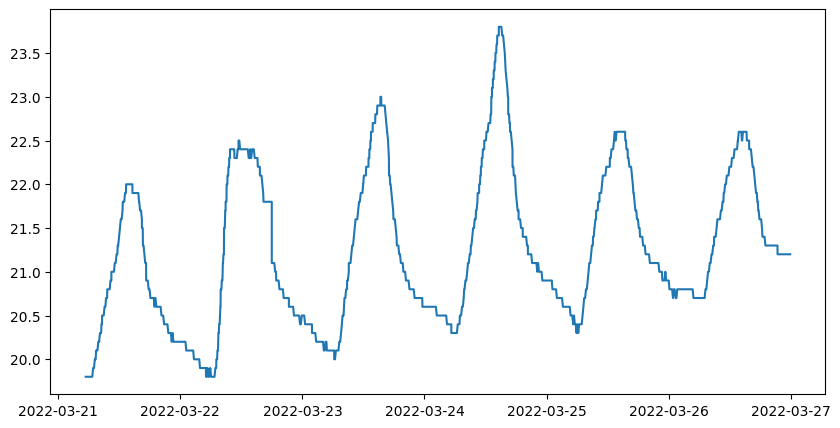

In [699]:
plt.figure(figsize = (10, 5))
plt.plot(df_ibuquarium.Temperature)

Sur ce graphe, on peut remarquer une certaine périodicité de la température. On observe successivement une augmentation, ensuite lorsqu'un pic est atteint, la température chute et ceci pendant la période de temps considérée.

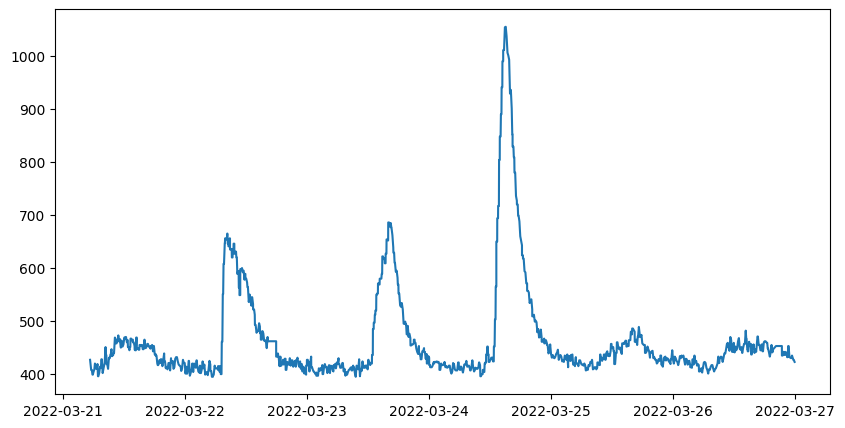

In [700]:
plt.figure(figsize = (10, 5))
plt.plot(df_ibuquarium.CO2)

Sur ce graphe, on observe une variation du CO2 dans le temps et on note un grand pic entre le 2022-03-24 et 2022-03-25.

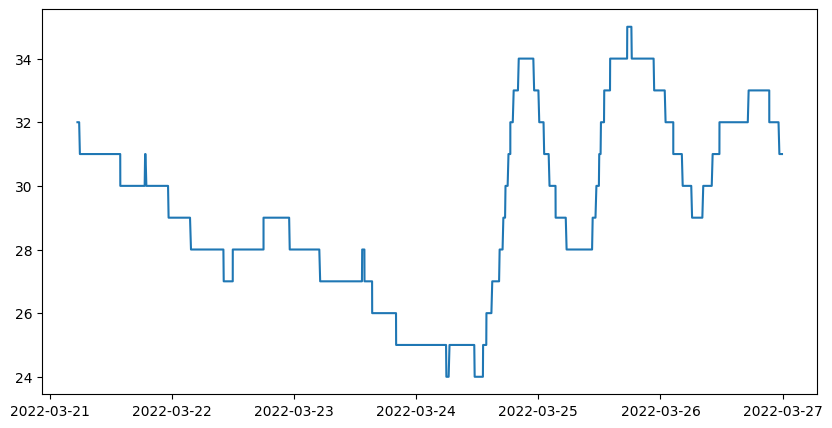

In [701]:
plt.figure(figsize = (10, 5))
plt.plot(df_ibuquarium.Humidite)

La variation de l'humidité ne suit pas la même allure que celle des deux autres courbes.

**De l'analyse de ces différents graphes, on remarque que les deux premiers ont une allure similaire. Les différents pics enrégistré peuvent être assimilé à des moments où la salle est peut être occupé.**

Intéressons nous aux variables deux à deux.

### Graphique 2 à 2 sous forme de nuages 2D

<Axes: xlabel='CO2', ylabel='Temperature'>

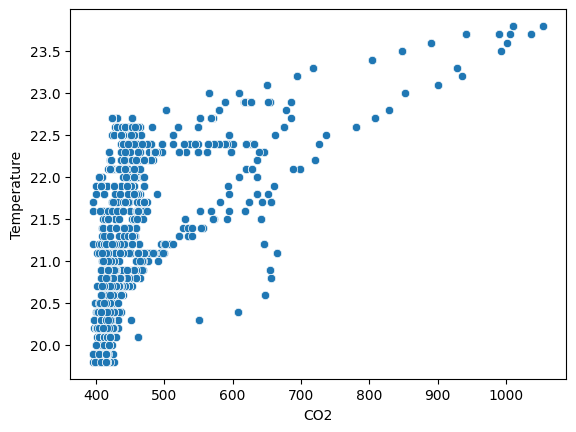

In [702]:
sns.scatterplot(data=df_ibuquarium, x='CO2', y='Temperature')

Sur ce graphe on remarque une concentration des points lorsque le CO2 est autour 400 ppm. Par contre un certains nombres de points reste tout de même éloigné de cette aglutination. Cela peut suggérer l'existence de groupe au sein de notre jeu de données.

<Axes: xlabel='Temperature', ylabel='Humidite'>

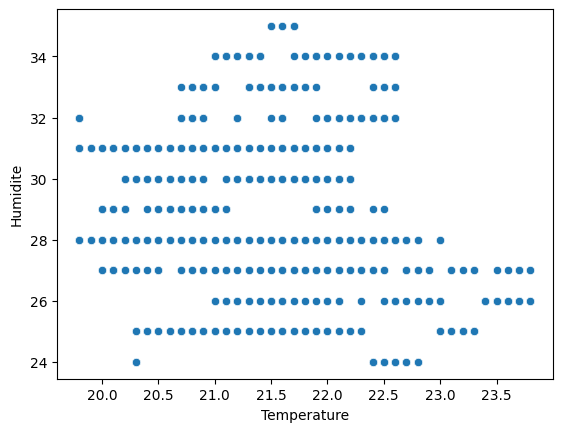

In [703]:
sns.scatterplot(data=df_ibuquarium, x='Temperature', y='Humidite')

<Axes: xlabel='CO2', ylabel='Humidite'>

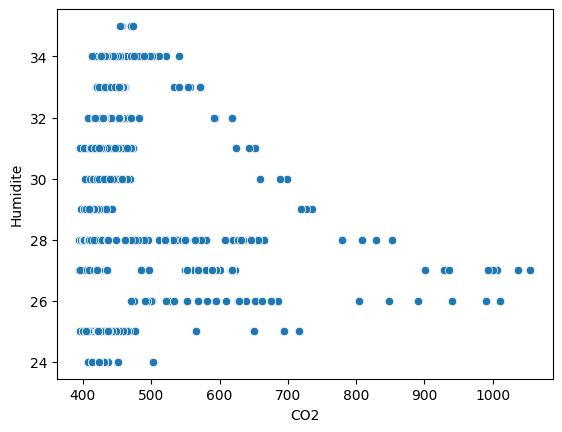

In [704]:
sns.scatterplot(data=df_ibuquarium, x='CO2', y='Humidite')

Les deux derniers graphes ne nous apportent pas de grande information sur l'existence visible de cluster.

### Graphe 3D

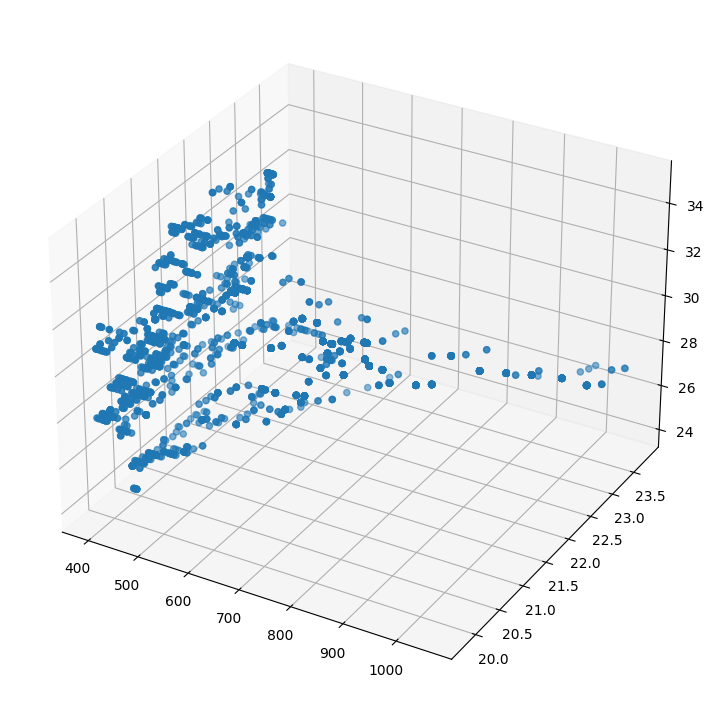

In [705]:
plt.figure(figsize = (9, 9))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(df_ibuquarium['CO2'], df_ibuquarium['Temperature'], df_ibuquarium['Humidite'])


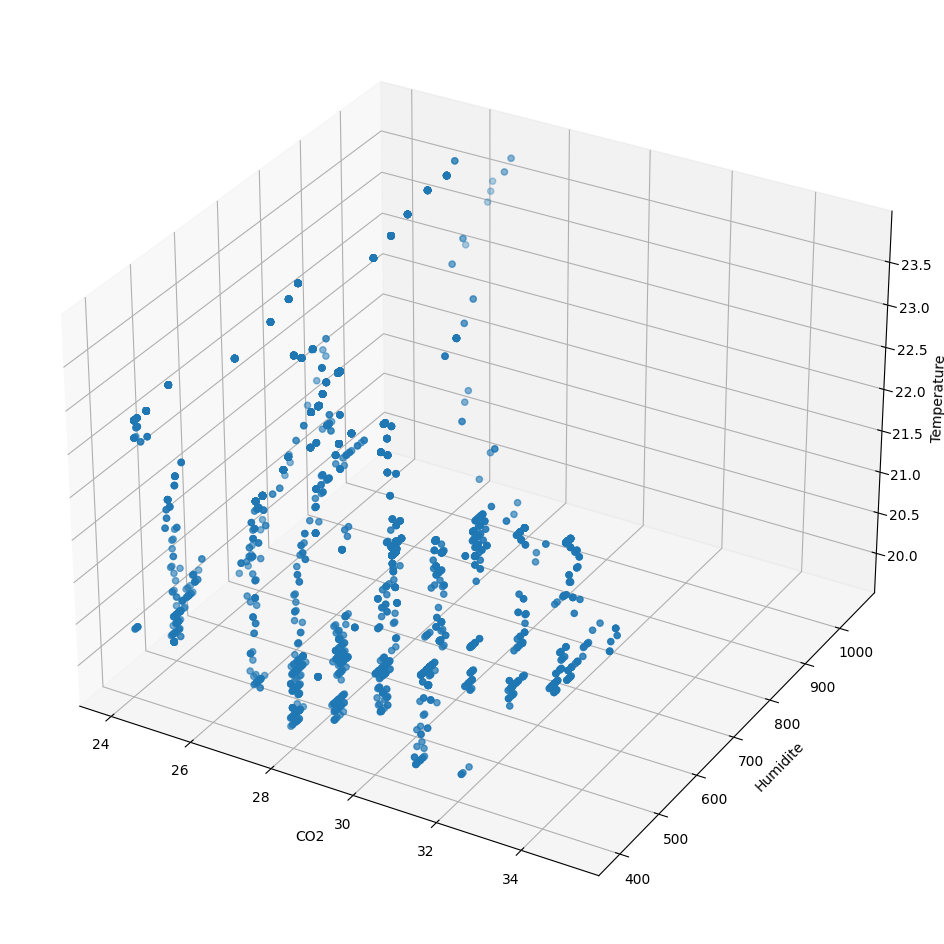

In [706]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(df_ibuquarium['Humidite'], df_ibuquarium['CO2'],  df_ibuquarium['Temperature'])

# Set the labels for each axis
ax.set_zlabel('Temperature')
ax.set_xlabel('CO2')
ax.set_ylabel('Humidite')

# Show the plot
plt.show()


En 3D, on peut voir une dispersion de nos points dans l'espace. Et on peut voir tout de même de regroupement de points même si ces regroupements ne peuvent être distinguer.

## Choisissez un cas faisant apparaître des clusters et utilisez un méthode de partitionnement de données pour mettre en évidence ces clusters. A partir des explications de (3) labellisez ces clusters ?

Nous allons nous interesser à un cas spécifique faisant apparaître des clusters.
Pour ce faire, nous allons nous intéressé au 2022-03-22, ce jour où nous avons la confirmation avec l'hyperplaning qu'il y a eu cours dans cette salle de 
08h à 09h ensuite 09h15 à 11h45.

In [707]:
# On restreint nos données à la journée du '2022-03-22'

df_ibuquarium = df_ibuquarium[df_ibuquarium.index.floor('D') == '2022-03-22']

### Faisons un zoom de nos graphes précédent sur cette journée particulière

Afin d'avoir une bonne visualisation, ramenons nos données à la même echelle en les normalisant.

In [708]:
df_copy = df_ibuquarium.copy()

In [709]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_ibuquarium.loc[:, ['Temperature', 'CO2', 'Humidite']] = scaler.fit_transform(df_ibuquarium[['Temperature', 'CO2', 'Humidite']])


<ipython-input-709-2a1882e774c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibuquarium.loc[:, ['Temperature', 'CO2', 'Humidite']] = scaler.fit_transform(df_ibuquarium[['Temperature', 'CO2', 'Humidite']])


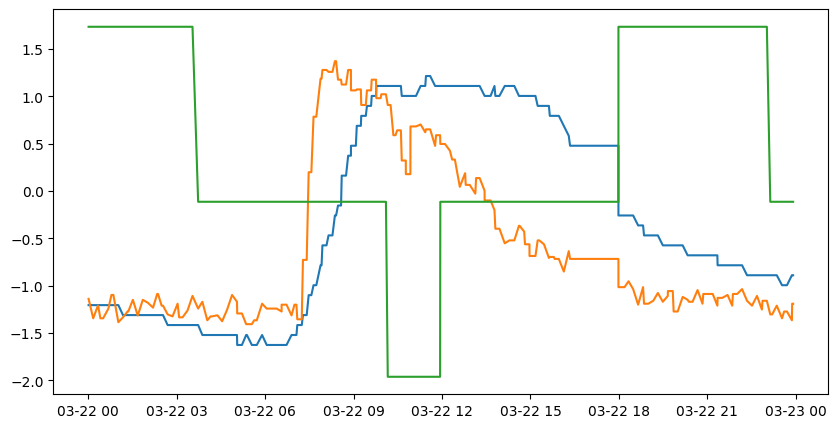

In [710]:
fig = plt.figure(figsize = (10, 5))

plt.plot(df_ibuquarium.Temperature)
plt.plot(df_ibuquarium.CO2)
plt.plot(df_ibuquarium.Humidite)

On remarque effectivement une tendance similaire pour la température et le C02. L'humidité à une tendance inverse aux deux autres par contre.

Déjà un peu avant l'heure du cours 08h on remarque une augmentation de la température et du C02 avec une baisse de l'humidité. Ensuite pendant le cours la température et le C02 atteignent leur pic maximal tandis que l'humidité atteint son pic minimal. Après le cours la température et le C02 baissent alors que l'humidité quant à elle augmente.

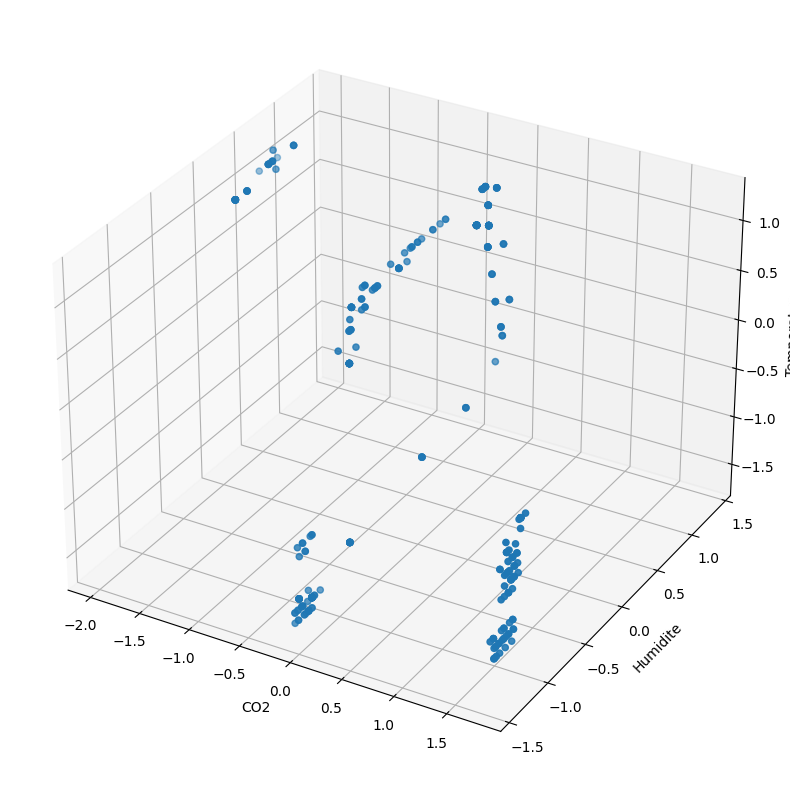

In [711]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(df_ibuquarium['Humidite'], df_ibuquarium['CO2'],  df_ibuquarium['Temperature'])

# Set the labels for each axis
ax.set_zlabel('Temperature')
ax.set_xlabel('CO2')
ax.set_ylabel('Humidite')

# Show the plot
plt.show()

On remarque clairement la formation de trois clusters. Nous pouvons pensé à l'avant, le pendant et l'après cours. Mais comme nous voulons étudier l'occupation ou non, on pourra mettre les cluster avant et après ensemble.

### Identifions les clusters avec l'algorithme KMeans

Etant donné que KMeans utilise le calcul de distance, il est donc necessaire de ramener nos données à la même échelle. Ce que nous avons déjà fait plus haut.

In [712]:
df_ibuquarium.head(2)

,CO2,Temperature,Humidite
DateTime,,,
2022-03-22 00:00:30,-1.138221,-1.204621,1.735209
2022-03-22 00:09:56,-1.343973,-1.204621,1.735209


Pour trouver le nombre optimum de cluster, nous allons utilisé la méthode appelée Elbow. 

Pour ce faire, il faut représenter l'inertie (qui mésure la qualité du clustering réalisé par l'algorithme K-Means) en fonction du nombre de cluster.

Sur ce graphe, on cherche la valeur à partir de laquelle l'inertie commence par chuter dessinant un creux de coude.

In [713]:
from sklearn.cluster import KMeans


def optimize_k_means(data, max_k):
  means = []
  inertias = []
  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init="auto")
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # Generate the elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel("Number of Clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.show()

In [714]:
X = df_ibuquarium[['Temperature', 'CO2', 'Humidite']]

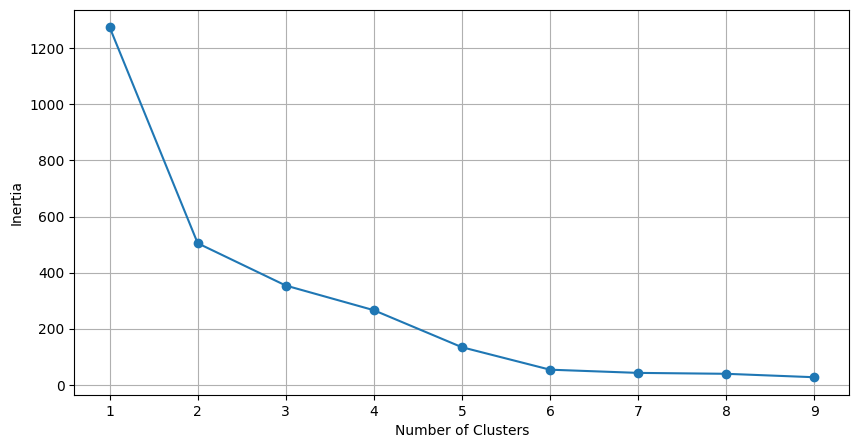

In [715]:
optimize_k_means(X, 10)

A l'aide de ce graphe on se rend bien compte que sur cet intervalle de temps considéré qu'est la journée du 2022-03-22, le nombre de cluster égal 2 est la valeur nous permettant d'obtenir des clusters vraiment séparés comme indique la la règle Elbow sur ce graphe.

In [716]:
# On entraine notre model avec cette valeur de 2
model = KMeans(init="k-means++", n_clusters=2, n_init="auto", random_state=3425)
y_clusters = model.fit_predict(X)



In [717]:
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,



*   Le label 1 correspond à l'inoccupation de la salle
*   Le label 0 correspond à l'occupation de la salle



In [718]:
df_copy

,CO2,Temperature,Humidite
DateTime,,,
2022-03-22 00:00:30,421,20.200001,29
2022-03-22 00:09:56,401,20.200001,29
2022-03-22 00:19:31,414,20.200001,29
2022-03-22 00:19:59,414,20.200001,29
2022-03-22 00:24:33,401,20.200001,29
...,...,...,...
2022-03-22 23:36:15,408,20.400000,28
2022-03-22 23:42:02,408,20.400000,28
2022-03-22 23:52:04,399,20.500000,28


In [719]:
# Generate csv for labelled data

df_copy['class'] = y_clusters

In [720]:
df_copy.to_csv('labelled_data.csv')
from google.colab import files
files.download("labelled_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  Étiqueté vos données avec ces labels dans le relevé de mesure utilisé.

In [721]:
df_ibuquarium['class'] = y_clusters

In [722]:
df_ibuquarium.head(2)

,CO2,Temperature,Humidite,class
DateTime,,,,
2022-03-22 00:00:30,-1.138221,-1.204621,1.735209,1
2022-03-22 00:09:56,-1.343973,-1.204621,1.735209,1


In [723]:
# k_means_cluster_centers = k_means.cluster_centers_
# k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

In [724]:
# k_means_labels

<Axes: ylabel='count'>

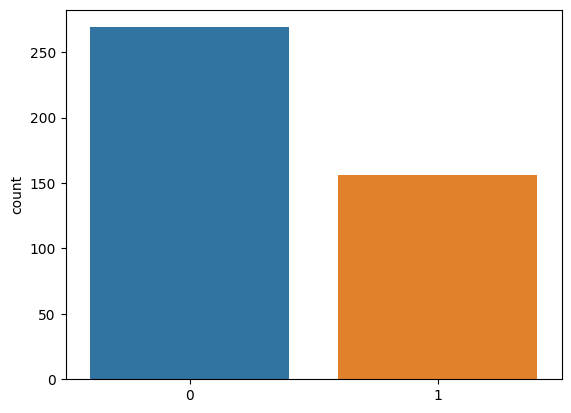

In [725]:
sns.countplot(x =y_clusters)


In [726]:
X

,Temperature,CO2,Humidite
DateTime,,,
2022-03-22 00:00:30,-1.204621,-1.138221,1.735209
2022-03-22 00:09:56,-1.204621,-1.343973,1.735209
2022-03-22 00:19:31,-1.204621,-1.210234,1.735209
2022-03-22 00:19:59,-1.204621,-1.210234,1.735209
2022-03-22 00:24:33,-1.204621,-1.343973,1.735209
...,...,...,...
2022-03-22 23:36:15,-0.994197,-1.271960,-0.113071
2022-03-22 23:42:02,-0.994197,-1.271960,-0.113071
2022-03-22 23:52:04,-0.888984,-1.364548,-0.113071


In [727]:
X[y_clusters == 0]['Temperature']

DateTime
2022-03-22 07:38:20   -0.994197
2022-03-22 07:38:22   -0.994197
2022-03-22 07:40:14   -0.994197
2022-03-22 07:40:28   -0.994197
2022-03-22 07:41:09   -0.994197
                         ...   
2022-03-22 16:50:29    0.478778
2022-03-22 17:25:13    0.478778
2022-03-22 17:50:48    0.478778
2022-03-22 17:53:20    0.478778
2022-03-22 17:58:58    0.478778
Name: Temperature, Length: 269, dtype: float64

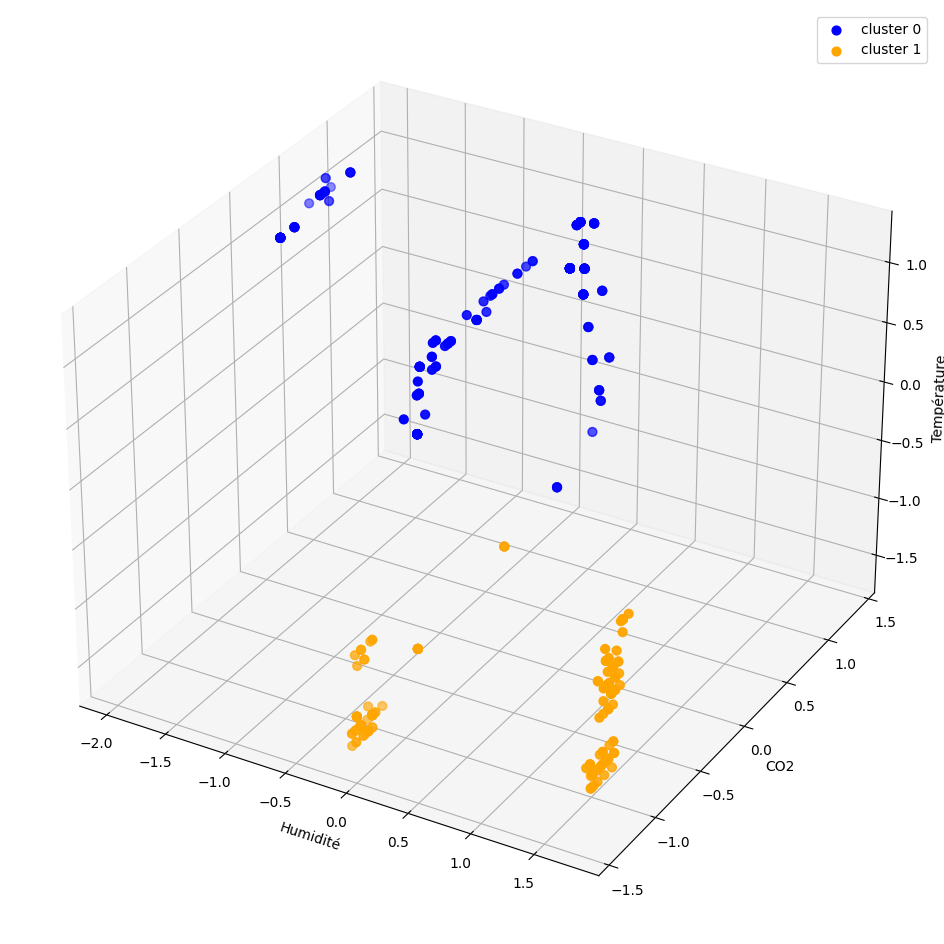

In [728]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0]['Humidite'], X[y_clusters == 0]['CO2'] ,X[y_clusters == 0]['Temperature'], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1]['Humidite'], X[y_clusters == 1]['CO2'] ,X[y_clusters == 1]['Temperature'], s = 40 , color = 'orange', label = "cluster 1")

ax.set_xlabel('Humidité')
ax.set_ylabel('CO2')
ax.set_zlabel('Température')
ax.legend()
plt.show()

Ceci est une visualisation des clusters après l'étiquettage des données.

## Construisez un modèle de prédiction avec un algorithme que vous choisirez (ex. KNN)

In [729]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_ibuquarium.iloc[:, :-1]  # Variables explicatives
y = df_ibuquarium['class']  # Variable à expliquer

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle KNN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))

Précision du modèle KNN : 100.00%


In [730]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

In [731]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [732]:
!cp '/content/drive/MyDrive/Colab Notebooks/ProjetIOT.ipynb' ./
!jupyter nbconvert --to PDF "ProjetIOT.ipynb"


[NbConvertApp] Converting notebook ProjetIOT.ipynb to PDF
[NbConvertApp] Support files will be in ProjetIOT_files/
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Making directory ./ProjetIOT_files
[NbConvertApp] Writing 84089 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WA